# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
#libraries for data manipulating
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

#library to split data
from sklearn.model_selection import train_test_split

#library for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#for hyper parameters tunning
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
)
from sklearn.metrics import confusion_matrix
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# read the data
df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Loan_Modelling.csv')
# returns the first 5 rows
df_main.head()

Mounted at /content/drive


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [ ]:
#Make copy of the main data
df = df_main.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.shape

(5000, 14)

Observations : The dataset has 5000 rows and 14 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations :
*  All columns are numeric in nature . Out of all numeric column , ccavg is float data type .

*  There is no missing values



In [ ]:
#Checking for missing columns or null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observations  :

There are no null values in the dataset

In [ ]:
df.duplicated().sum()

0

Observations

There is no duplicate values in the data

# **Dropping the columns with all unique values **

In [ ]:
df.ID.nunique()

5000

ID column contains only unique values , so we can drop it

In [ ]:
df = df.drop(["ID"],axis=1)

In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


# Statistical summary of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,5000.00,93169.26,1759.46,90005.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities_Account,5000.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00


Observations #



*   Age,experience ,Education mean is equal to median , which means there is no skewness .
*   Mortgage and Income has outliers .








In [ ]:
df1 = df[df["Experience"] < 0]
df1['Experience'].unique()

array([-1, -2, -3])

In [ ]:
# replaceExp = {"Experience" : {-1:1,-2:2,-3:3}}
# df['Experience'] = df.replace(replaceExp,inplace=True)
df['Experience'].replace(-1,1,inplace=True)
df['Experience'].replace(-2,2,inplace=True)
df['Experience'].replace(-3,3,inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


Observations

*   Experience has negative values , we have to map to positive values



In [ ]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
df["ZIPCode"] = df["ZIPCode"].str[0:2]
df["ZIPCode"] = df["ZIPCode"].astype("category")

In [ ]:
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

In [ ]:
print(df.ZIPCode.value_counts())
#print(df.Family.value_counts())
print(df.Education.value_counts())
print(df.Personal_Loan.value_counts())
print(df.Securities_Account.value_counts())
print(df.CD_Account.value_counts())
print(df.Online.value_counts())
print(df.CreditCard.value_counts())

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIPCode, dtype: int64
Undergraduate    2096
Professional     1501
Graduate         1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


Observations 🇰

Above results shows that above features can be converted to categorical types

In [ ]:
#As we can from above results , we have to convert few of the columns in categorical type
cat_data = ['ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for feature in cat_data: # Loop through all columns in the dataframe
      df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.60,Undergraduate,0,0,1,0,0,0
1,45,19,34,90,3,1.50,Undergraduate,0,0,1,0,0,0
2,39,15,11,94,1,1.00,Undergraduate,0,0,0,0,0,0
3,35,9,100,94,1,2.70,Graduate,0,0,0,0,0,0
4,35,8,45,91,4,1.00,Graduate,0,0,0,0,0,1
5,37,13,29,92,4,0.40,Graduate,155,0,0,0,1,0
6,53,27,72,91,2,1.50,Graduate,0,0,0,0,1,0
7,50,24,22,93,1,0.30,Professional,0,0,0,0,0,1
8,35,10,81,90,3,0.60,Graduate,104,0,0,0,1,0
9,34,9,180,93,1,8.90,Professional,0,1,0,0,0,0


Observations



*   features in cat_data are changed to categorical data type



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

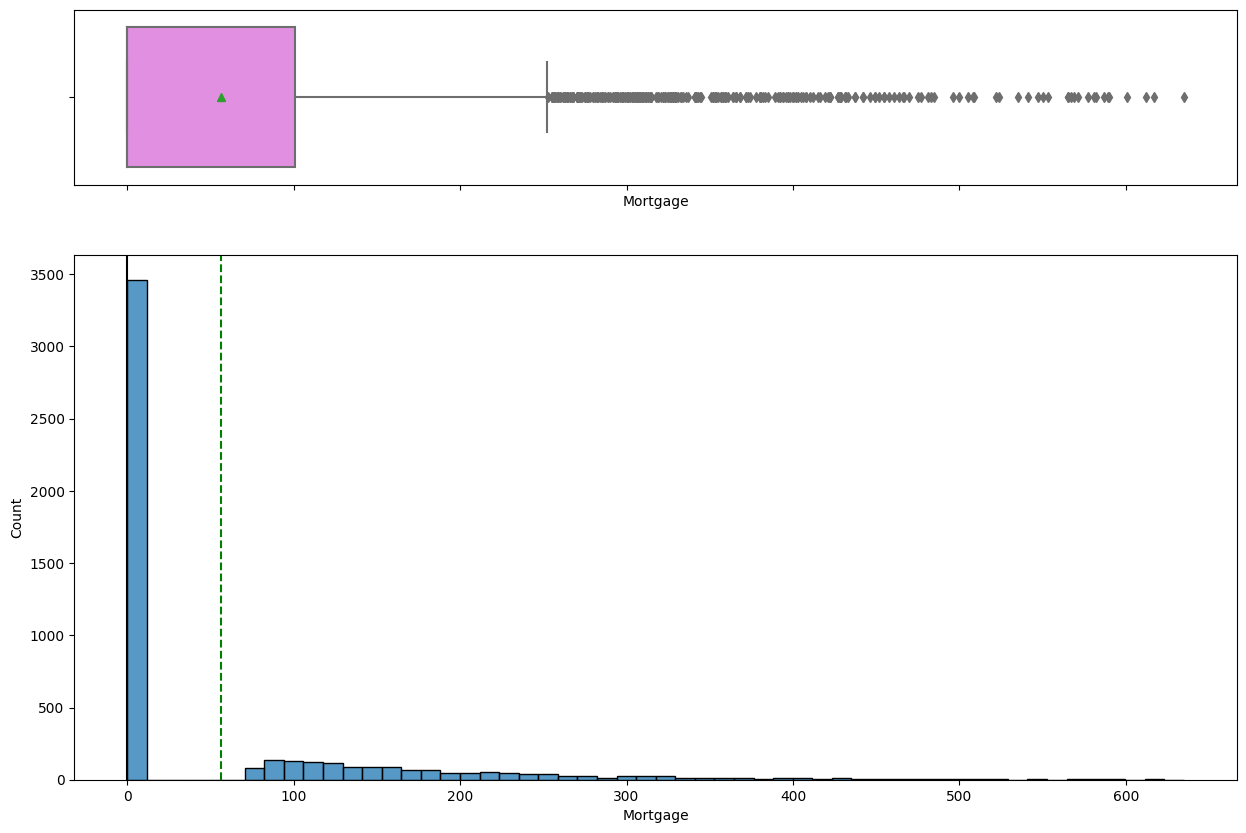

In [ ]:
histogram_boxplot(df,"Mortgage")

# sns.histplot(data=df,x='Mortgage',kde=True)
# plt.show();

# sns.boxplot(data=df,x='Mortgage')
# plt.show()

Observations


*   Distribution is right skewed as mean is greater than median .
*   We can also conclude that it has outliers
*   Customers have mortgage value greater than 600k
*   Most customers doesn't have mortgage



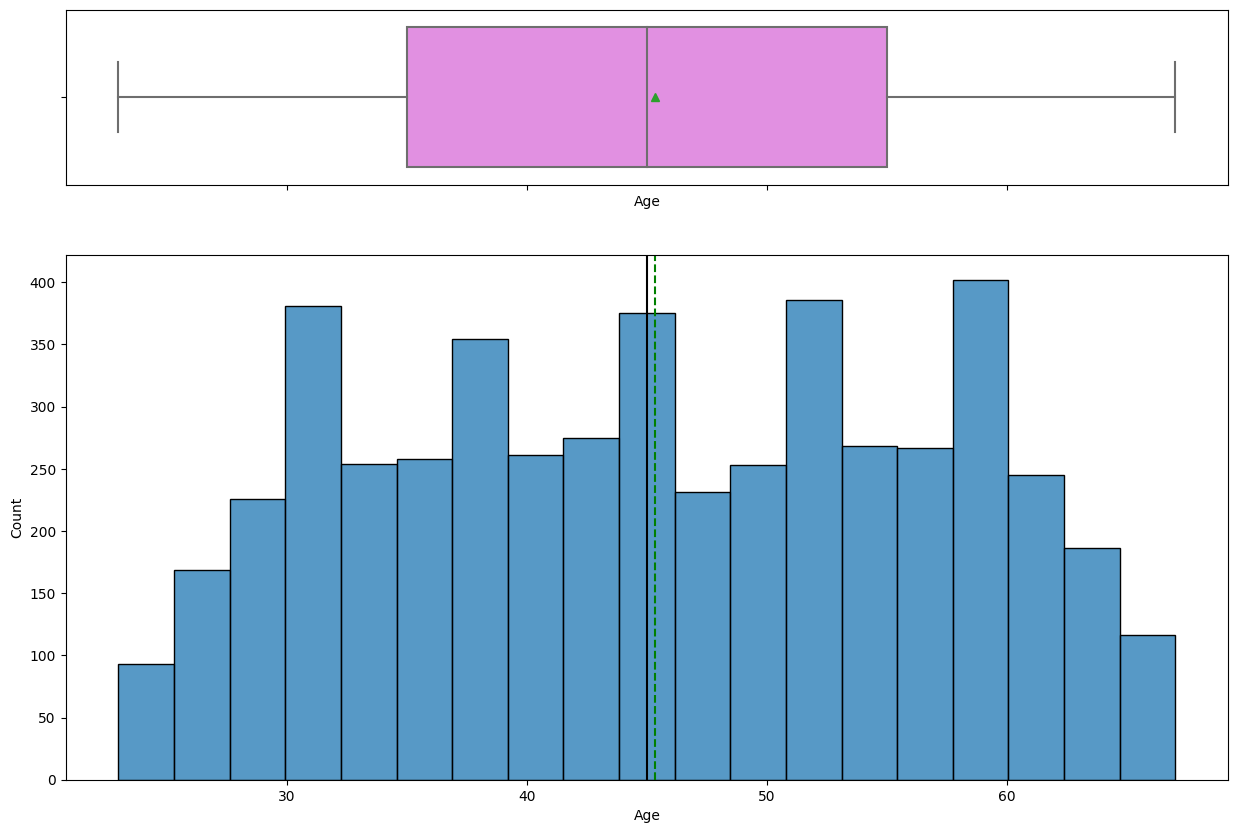

In [ ]:
histogram_boxplot(df, "Age")

Observations

*   The Age distribution looks slightly right skewed with a mean age around 45.
*   There is no outlier present.





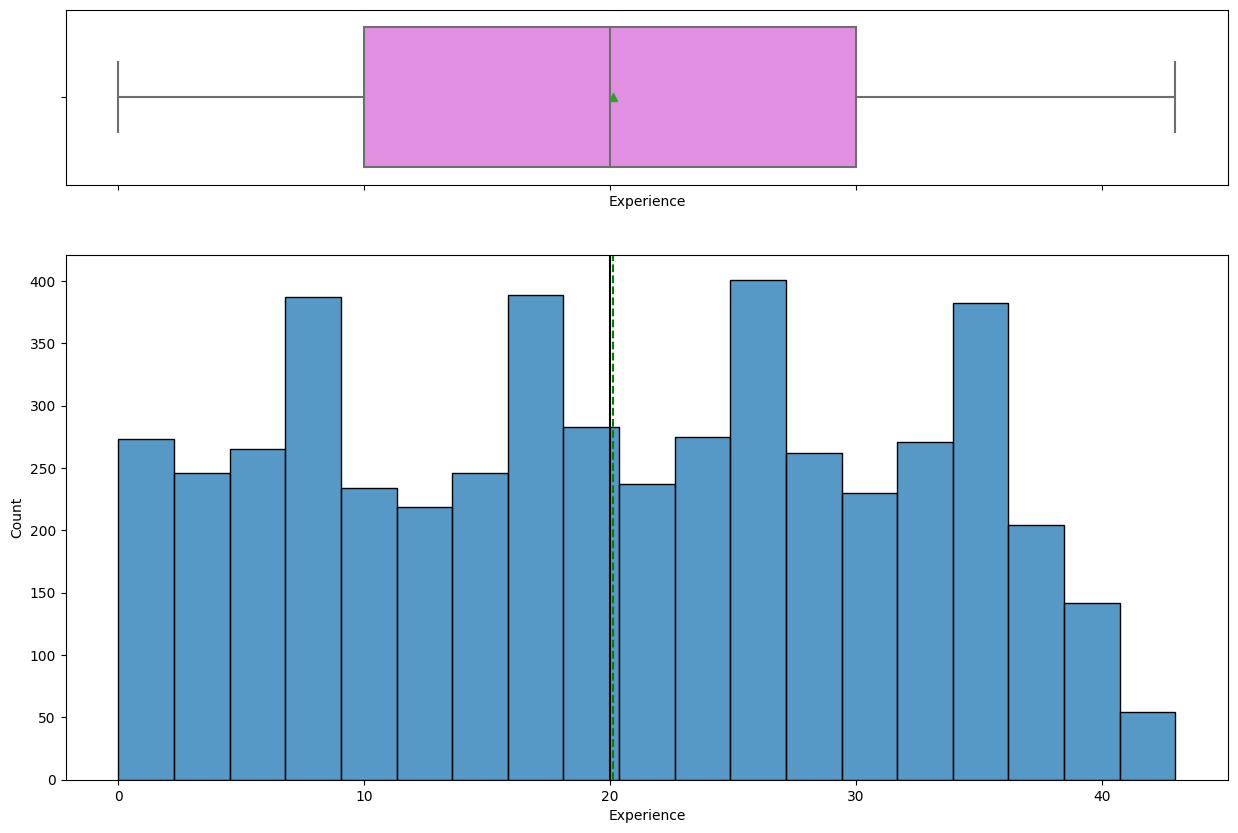

In [ ]:
histogram_boxplot(df, "Experience")

Observations

* The Experience distribution looks slightly right skewed with a mean experience around 20.
* There is no outlier present.




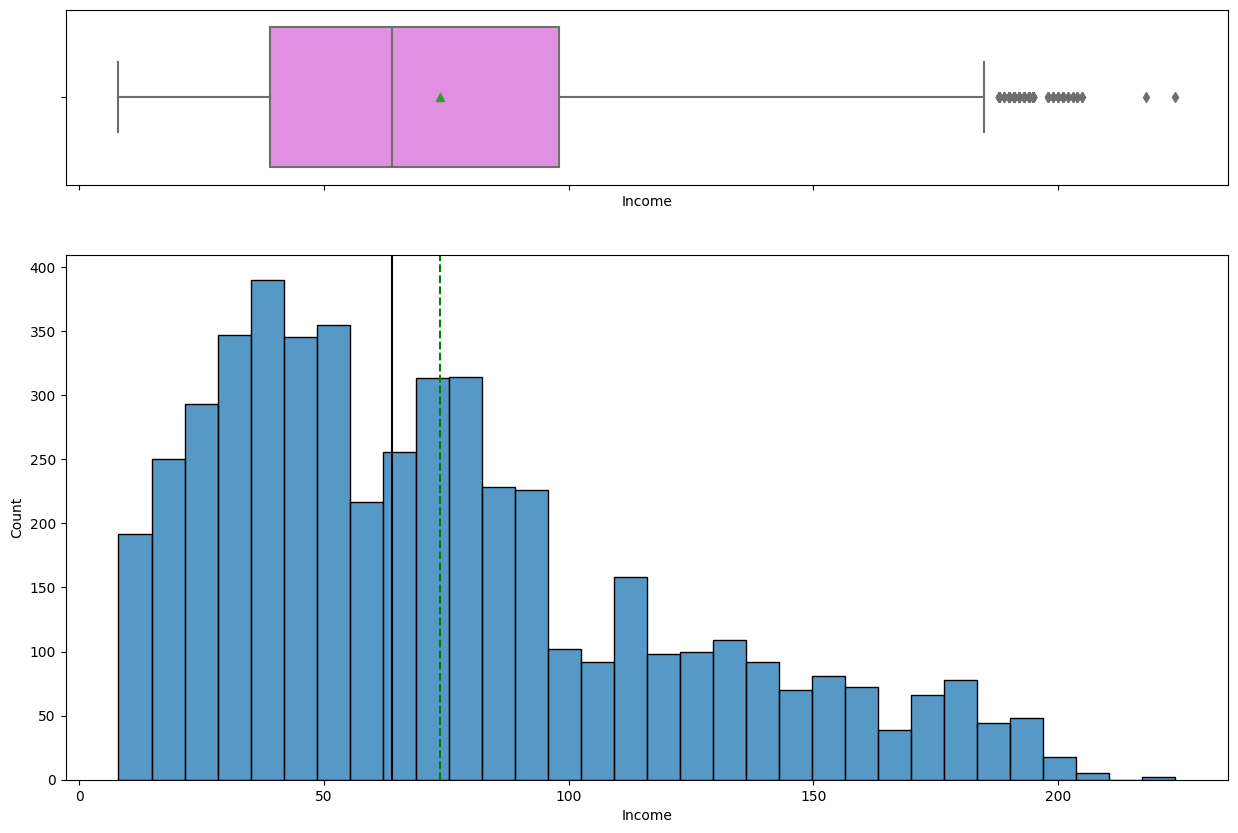

In [ ]:
histogram_boxplot(df, "Income")

Observations



*   Income distribution is slightly Right skewed
*   There are Outliers  



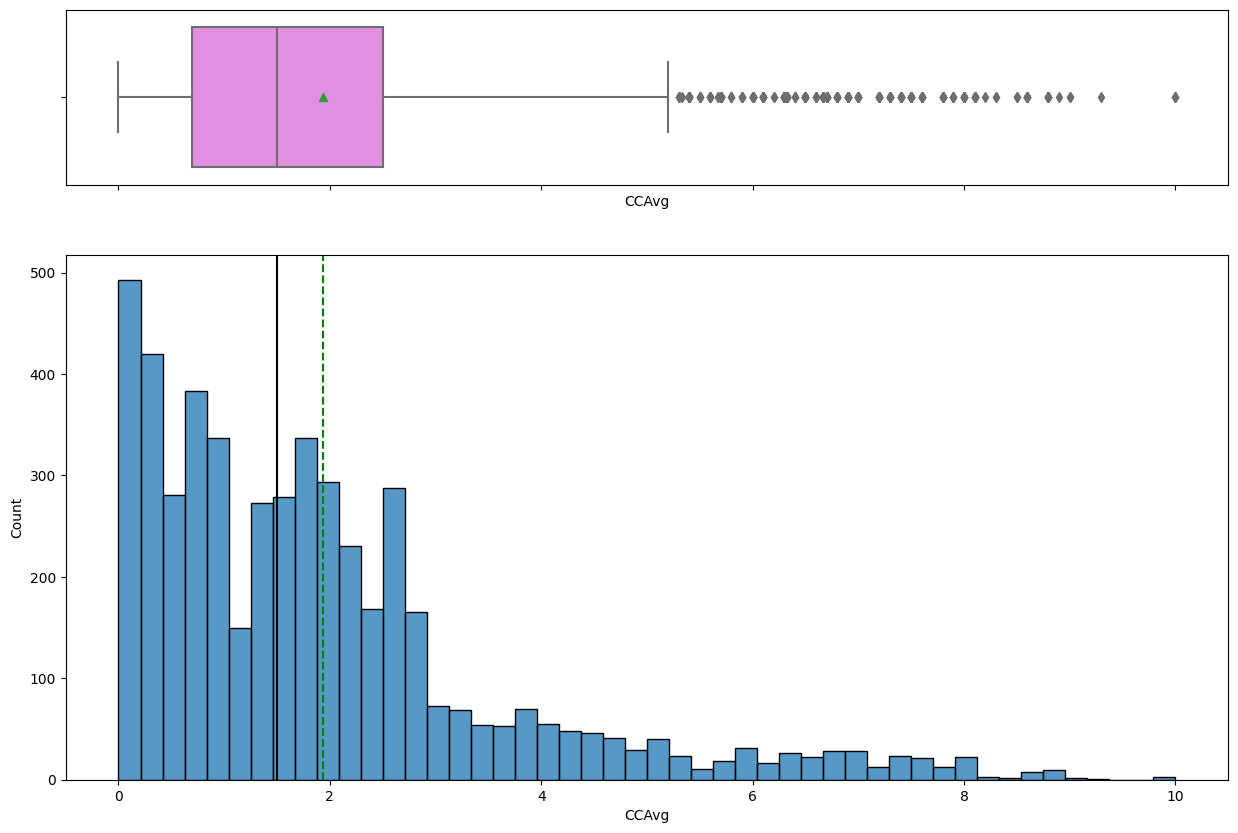

In [ ]:
histogram_boxplot(df, "CCAvg")

Observations

*   Distribution is slighlty right skewed with mean around 1.9
*   There are Outliers on the upper quartile.




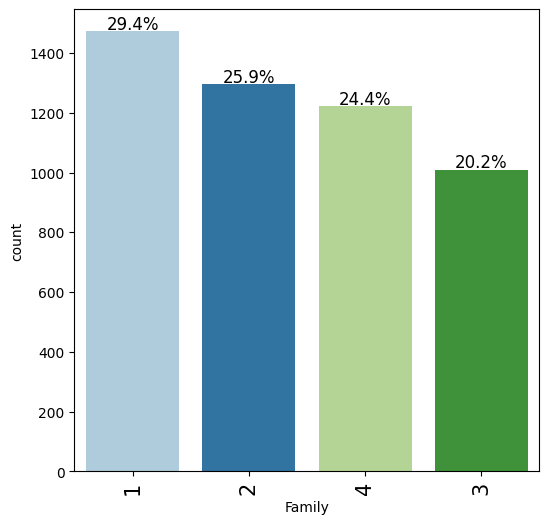

In [ ]:
labeled_barplot(df, "Family", perc=True)

Observations

*  Around 29.4% of family has one memeber , 25.9% has 2 member , 20.2% has 3 member and 24.4% has 4 member .




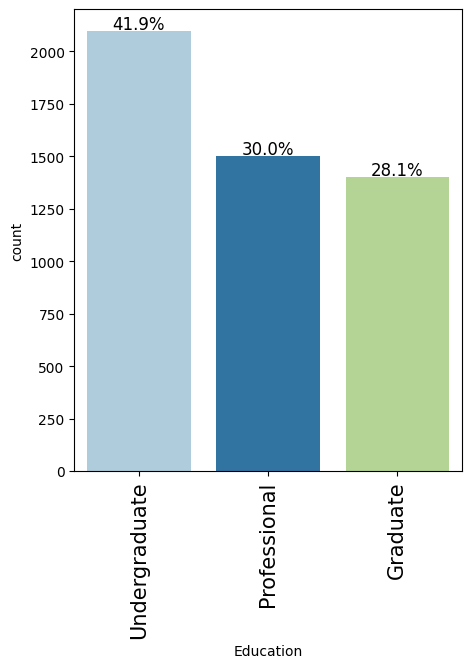

In [ ]:
labeled_barplot(df, "Education", perc=True)

Observations

*  41.9% of customer are Undergrad , 28.1% are Graduate and 30% of customer are Advanced/Professional




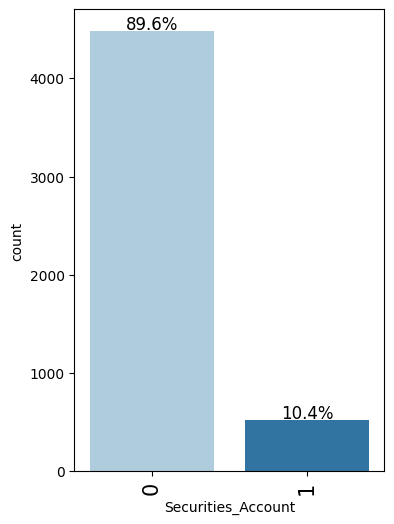

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True)

Observations

* 89.6% of customer doesn't have securities account in the bank .
* Only 10.4% of customer has securities account in the bank .





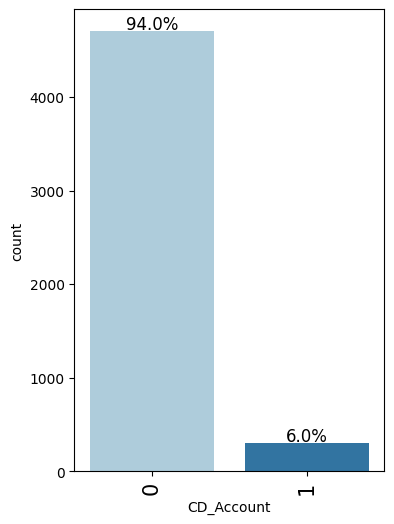

In [ ]:
# Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
# Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
# CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
# Online: Do customers use internet banking facilities? (0: No, 1: Yes)
# CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)
labeled_barplot(df, "CD_Account", perc=True)


Observations
* Almost 94% of customer doesn't have CD in the bank .

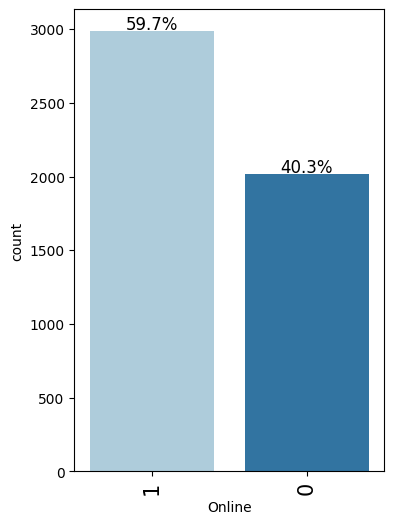

In [ ]:
labeled_barplot(df, "Online", perc=True)

Observations

* 59.7% of customer use online account .
* 40.3% of customer use bank services offline .



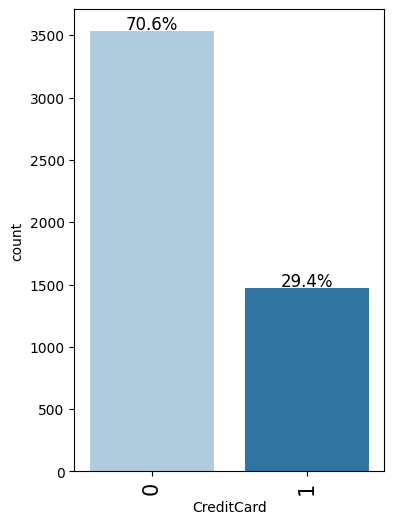

In [ ]:
labeled_barplot(df, "CreditCard", perc=True)

Observations

*   70.6% of customers uses issued by All life Bank while 29.4% of customers uses other banks credit card .




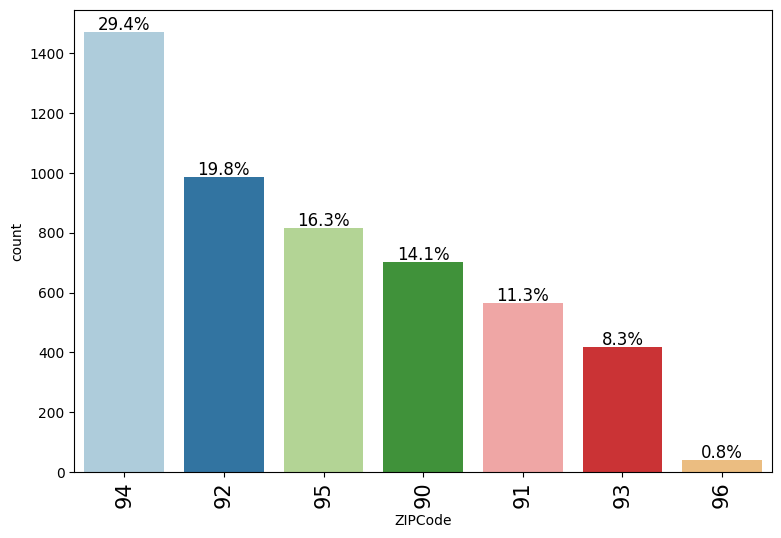

In [ ]:
labeled_barplot(df, "ZIPCode", perc=True)

Observations

*  29.4% of customers lives in zipcode starting with 94 , followed by 19.8%,16.3% ,14.1%,11.3% ,8.3% and 0.8% in 92,95,90,91,93 and 96





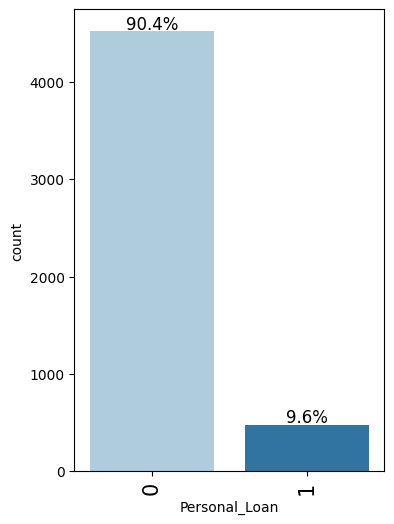

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

Observations
* 90.4% of customers has not taken personal loan from the bank , while 9.6% has taken

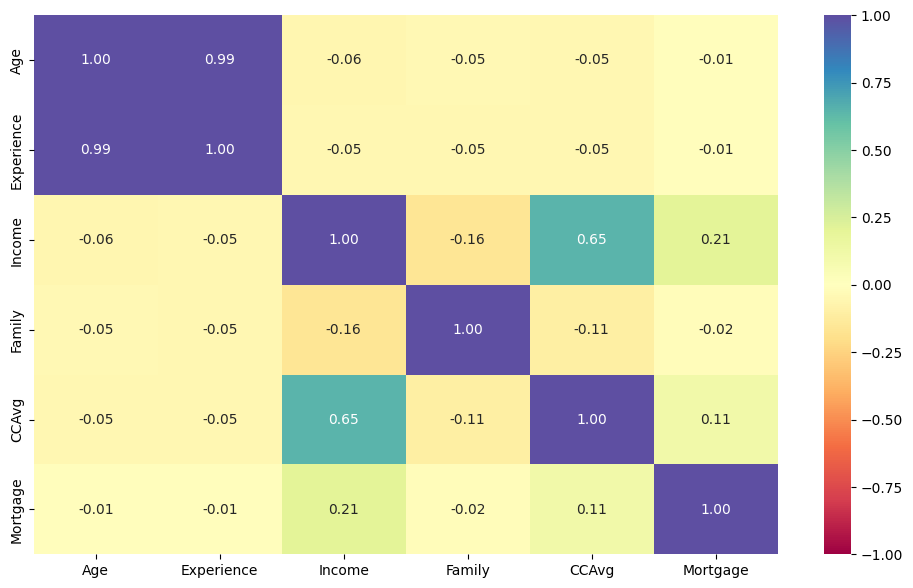

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations

* There's a positive correlation between the CCAvg and Income .
* There's a positive correlation between the Income and CCAvg to Mortgage.
* No other variables are correlated.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


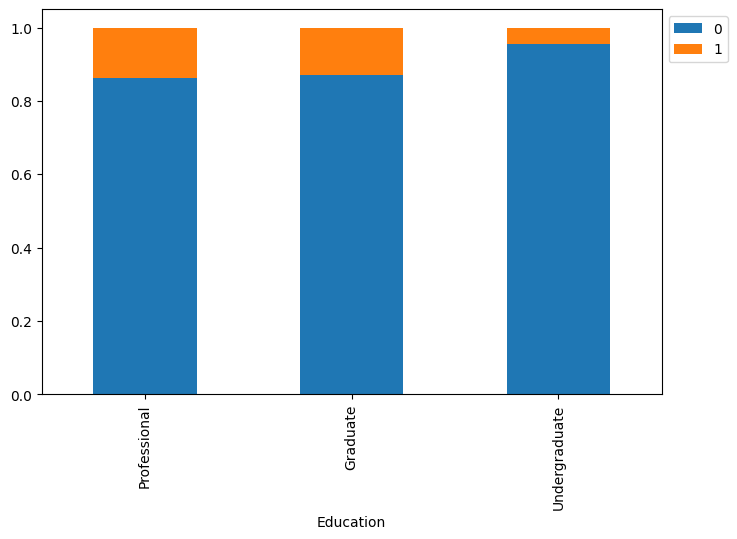

In [ ]:
stacked_barplot(df, "Education", "Personal_Loan")

Observations


*   Maximum number of customers who has taken personal loan from bank are Undergrad .
* Customer who has Professional/Advanced degree has taken less number of personal loan



Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


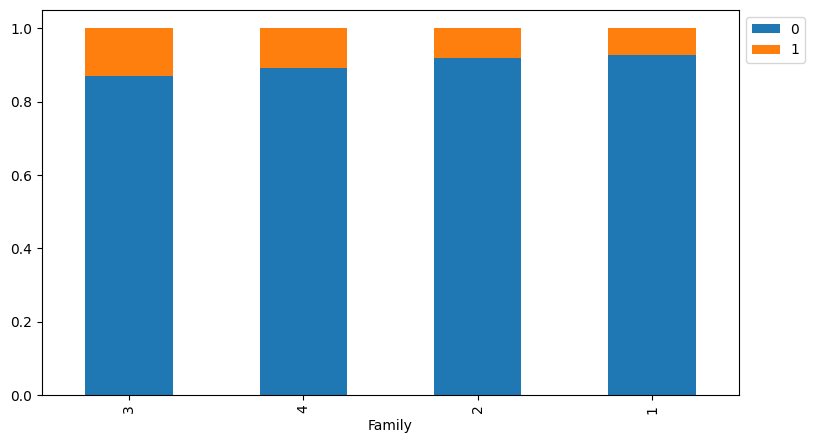

In [ ]:
stacked_barplot(df, "Family", "Personal_Loan")

Observations

*   Family size more than 3 or 4 has taken personal loan more than family size of 1 or 2




Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


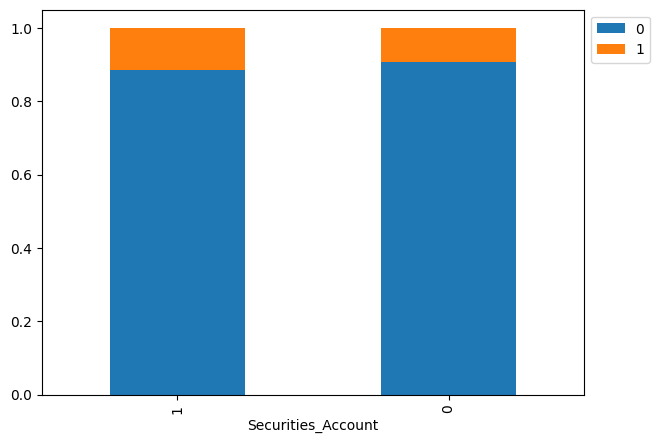

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

Observations

*   Customers who has securities account in the bank(462) , 60 customers have taken personal loan from the bank .
*   Out of 4058 customers which doesn't have securities account in the bank , 420 has taken personal loan






Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


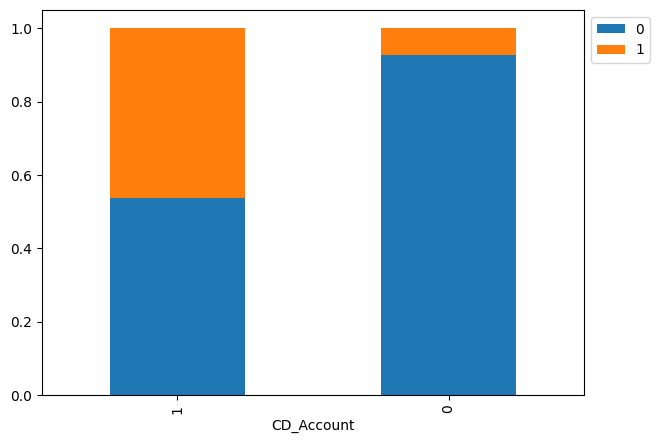

In [ ]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

Observations

* Customers who has taken CD (302) , 140 has taken personal loan which is around 45% .
* Customers who has taken CD (4698) , 340 has taken personal loan which is around 10%




Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


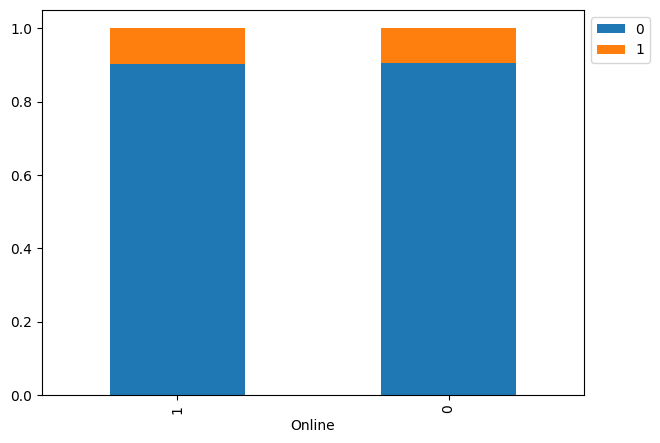

In [ ]:
stacked_barplot(df, "Online", "Personal_Loan")

Observations

*  Out of 2984 customers which has online account 291 customers has taken personal loan
*  Out of 2016 offline customers 189 has taken personal loan  



Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


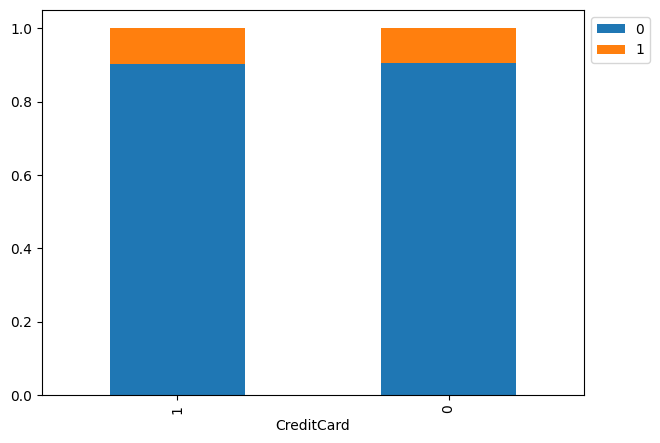

In [ ]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

Observations

*   1470 customers which have taken credit cards from the bank , 143 customers has taken personal loan .



Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


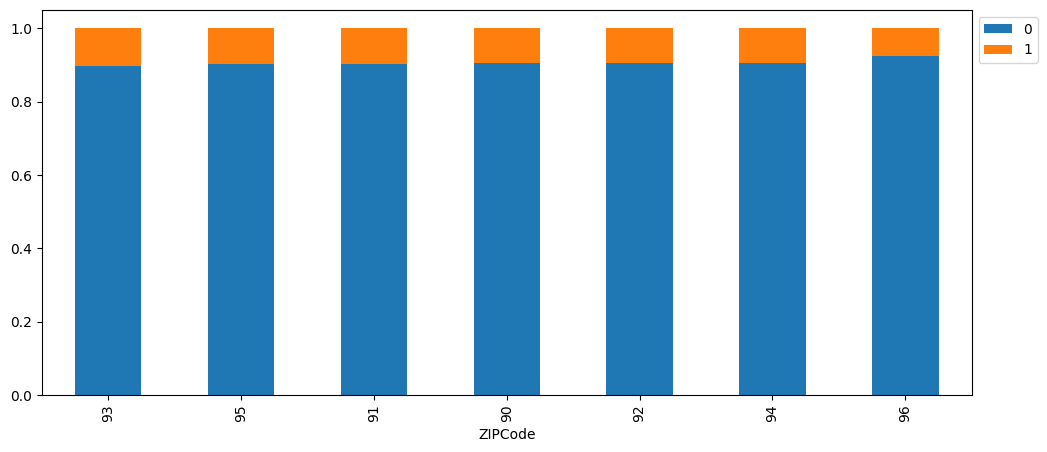

In [ ]:
stacked_barplot(df, "ZIPCode", "Personal_Loan")

Observations

* All of the zipcode , 5%-10% customer has  taken personal loan .

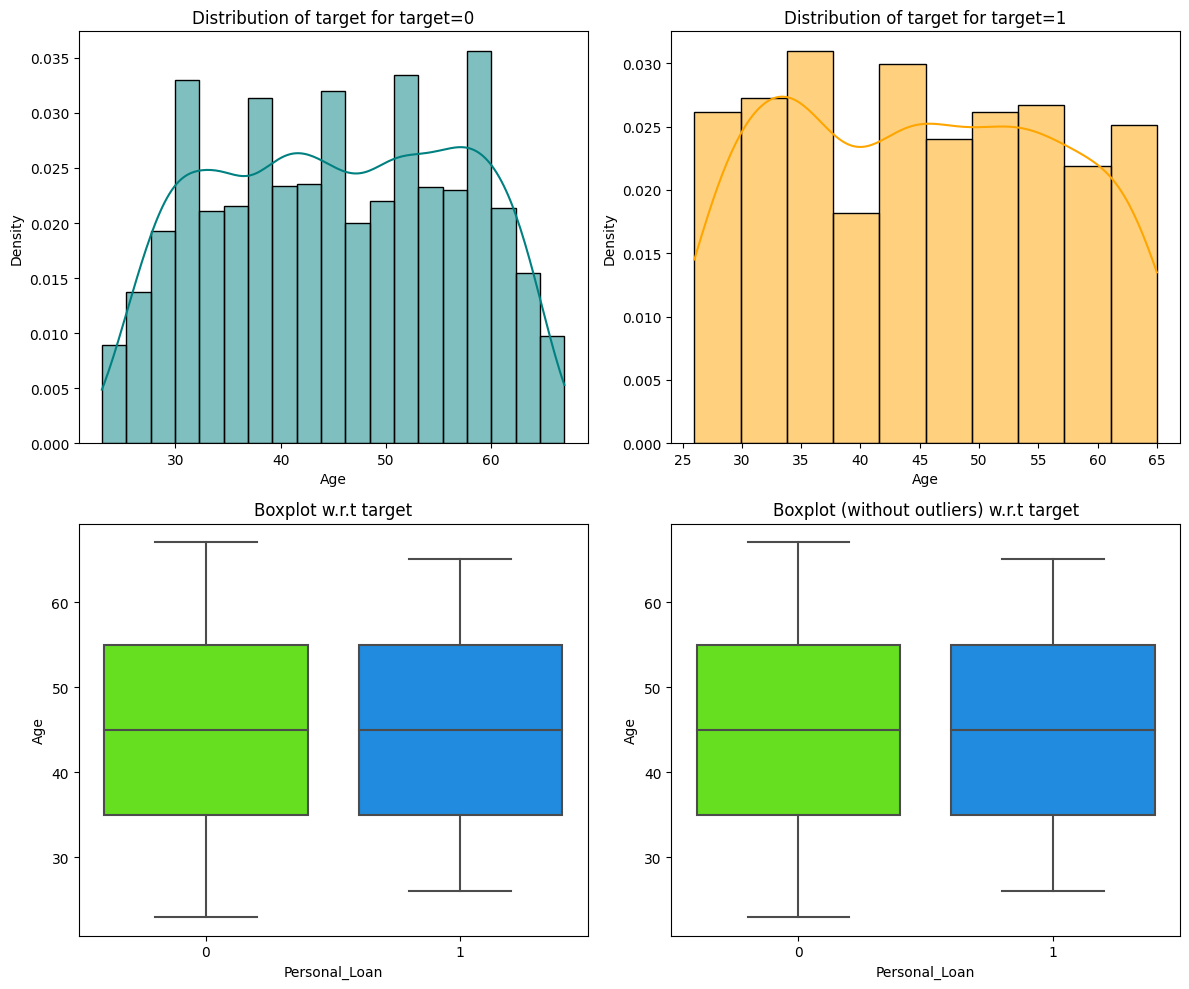

In [ ]:
distribution_plot_wrt_target(df,"Age", "Personal_Loan")

Observations

* We can't conlude that age is a factor to take personal loan

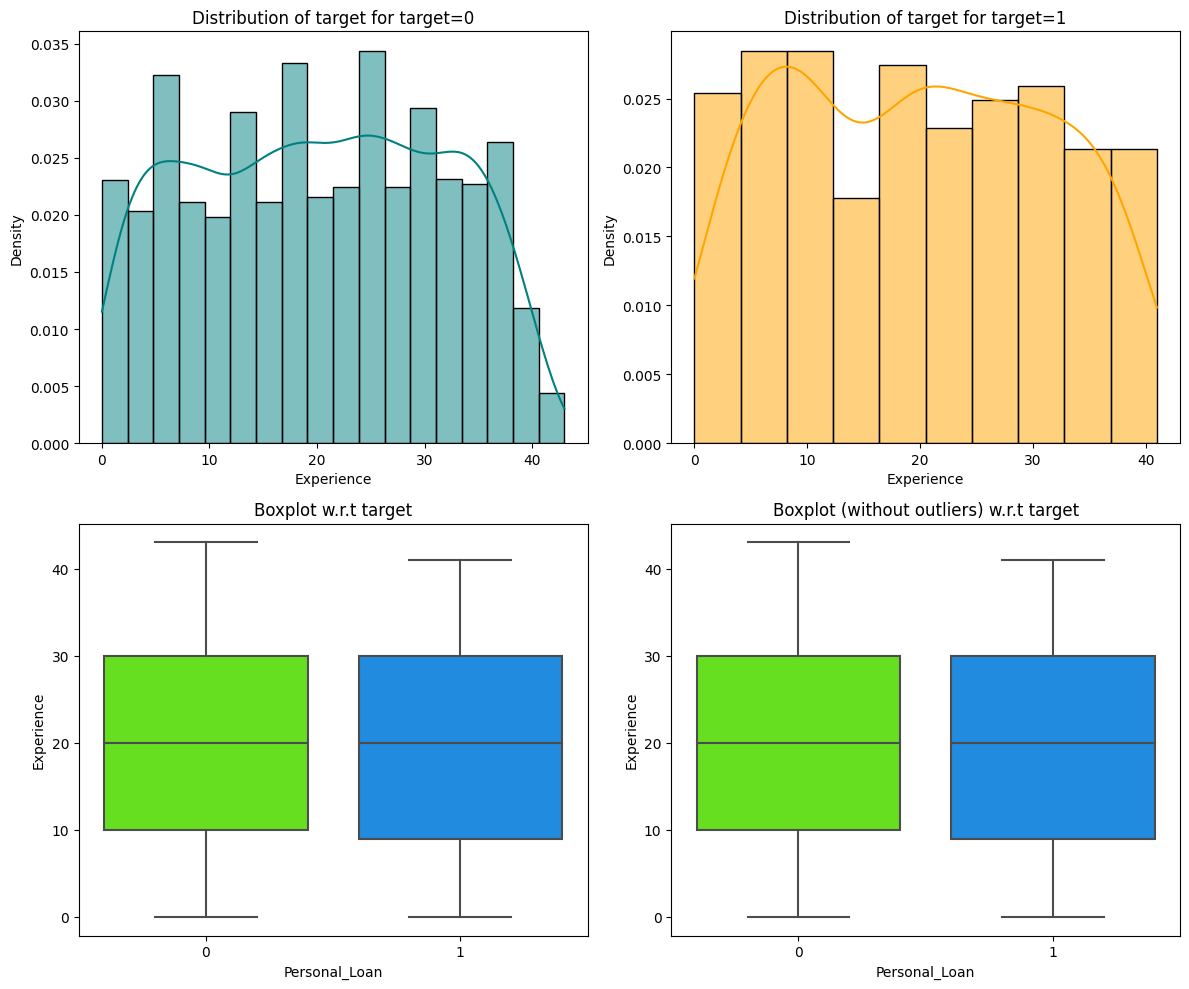

In [ ]:
distribution_plot_wrt_target(df,"Experience", "Personal_Loan")

* Personal loan is not effected by Experience

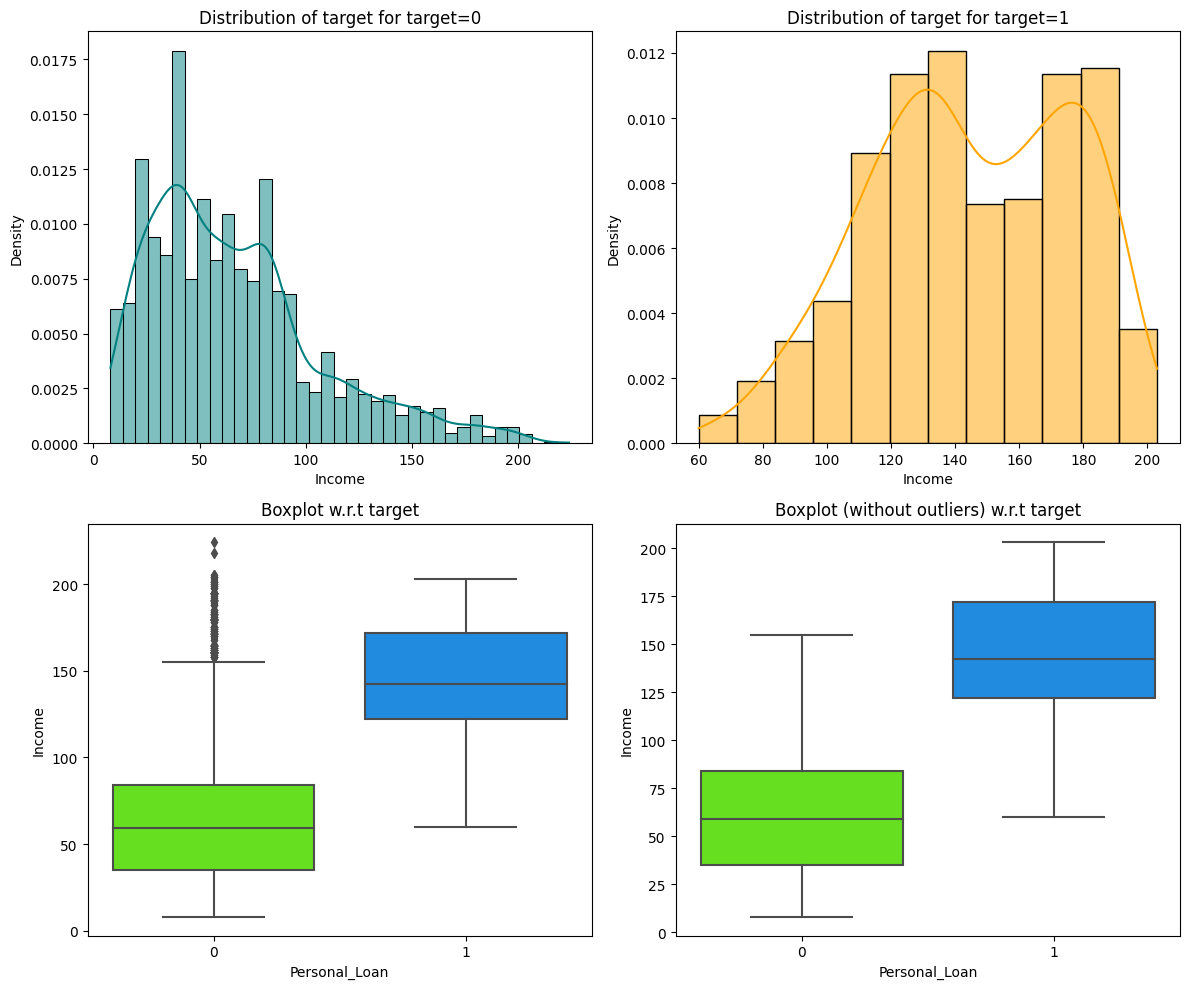

In [ ]:
distribution_plot_wrt_target(df,"Income", "Personal_Loan")

* Income greater than 90k likely to take personal loan
* There is a clear boundary showing separation of personal loan  based of the values of Income.

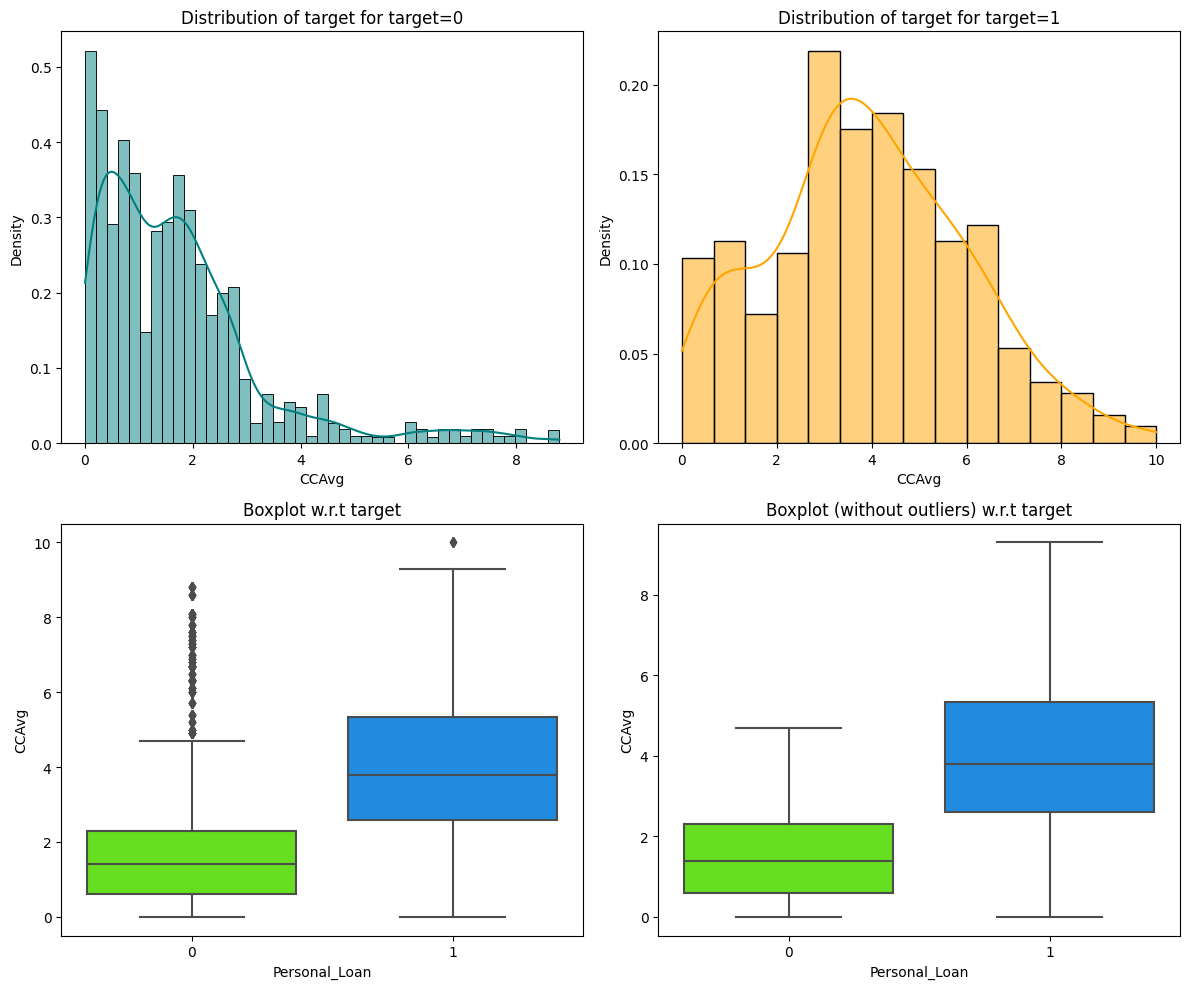

In [ ]:
distribution_plot_wrt_target(df,"CCAvg", "Personal_Loan")

* Customer who has CCAVg greater than 2.5 likely to take personal loan


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

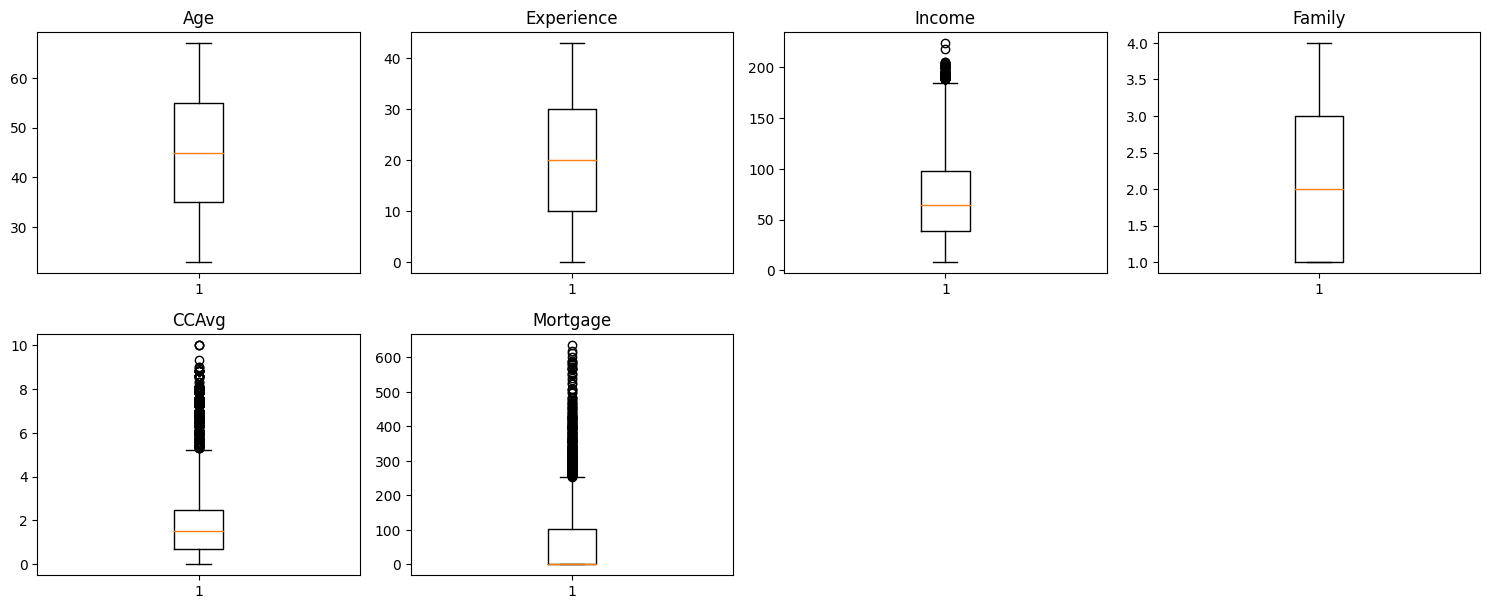

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [ ]:
X = df.drop(["Personal_Loan","Experience"], axis=1)
Y = df["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0   0.91
1   0.09
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90
1   0.10
Name: Personal_Loan, dtype: float64


## Model Building

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=1)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation Criterion

* Predicting a customer will not take personal loan but in reality , customer will take (FN)
* Predicting a customer will take personal loan but in reality , customer will not take (FP)

** Which Case is Important **

* If we predict that a customer will not take personal loan but in reality customer takes , then the bank will have to suffer a potential customer .
* If we predict that a customer will take loan  but in reality, the customer will not take, then the bank will have to bear the cost of resources(time,money etc ) spent on the customer .

Clearly , we need to reduce False Negatives i.e losing a customer who is supposed to take personal loan .

**How to reduce losses **

The Bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

We have to first define few functions , which will be used repeatedly
* defining a function to compute different metrics to check performance of a classification model built using sklearn
* confucion_matrix_sklearn


### Model Building

In [ ]:
def model_performance_classification_sklearn(model,predictors,target):
  """
  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  # predicting using the independent variables
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)  # to compute Accuracy
  recall = recall_score(target, pred)  # to compute Recall
  precision = precision_score(target, pred)  # to compute Precision
  f1 = f1_score(target, pred)  # to compute F1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

  return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

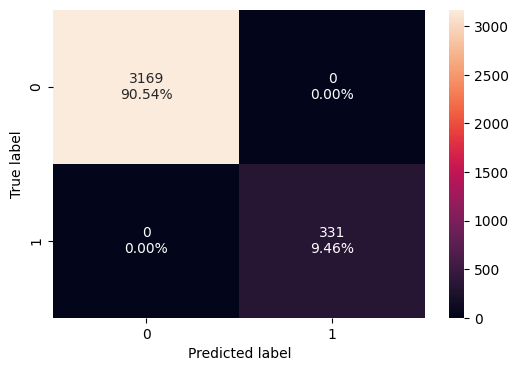

In [ ]:
confusion_matrix_sklearn(decisionTree, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    decisionTree, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    decisionTree, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.98,0.90,0.89,0.90


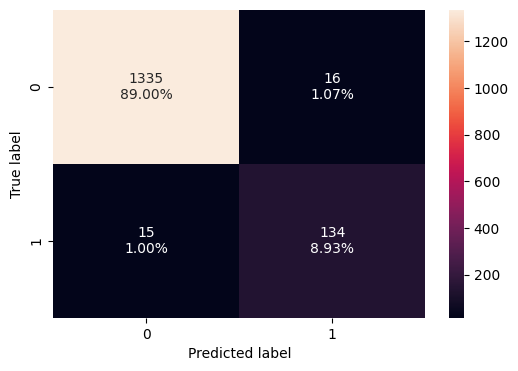

In [ ]:
confusion_matrix_sklearn(decisionTree, X_test, y_test)

### Model Performance Improvement

# Pre Pruning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    "max_leaf_nodes": [2,5,10,20],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf":[5,10,15,20],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=5, random_state=1)

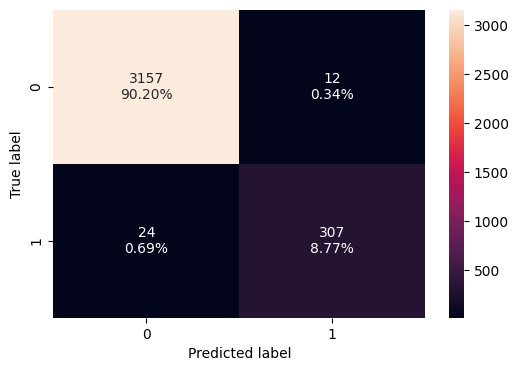

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99,0.93,0.96,0.94


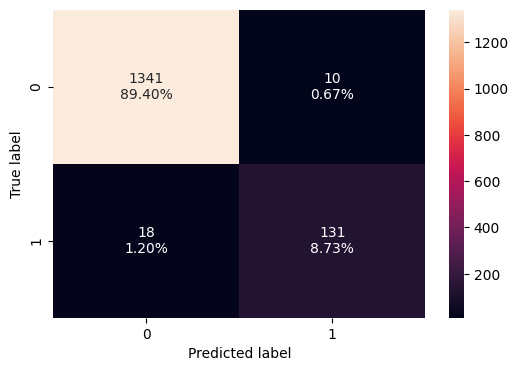

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.88,0.93,0.90


In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

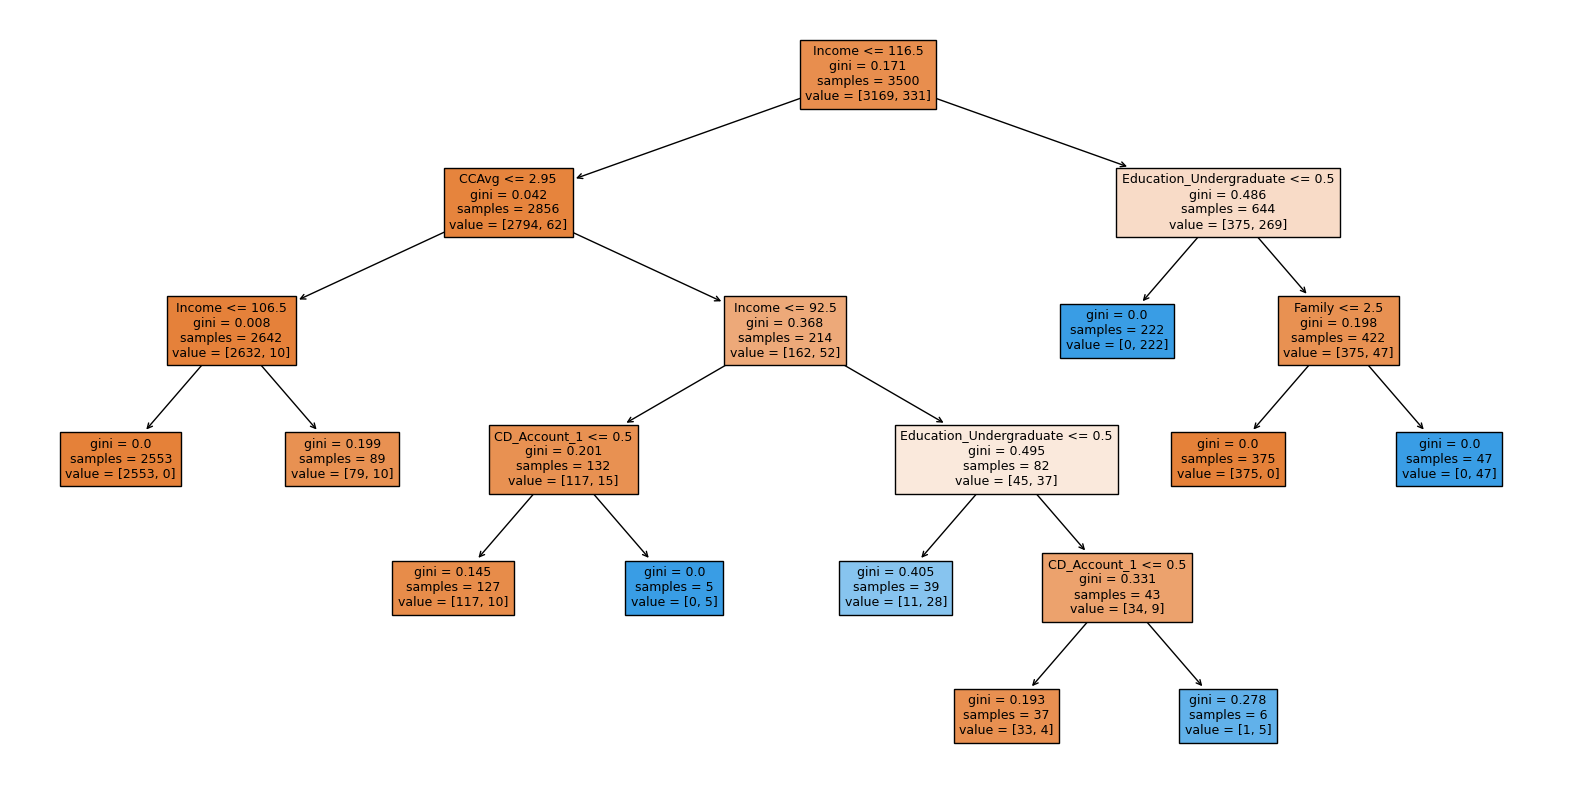

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|  

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.33141976, 0.15508328, 0.04206099, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.44619277, 0.        , 0.0252432 ,
       0.        , 0.        ])

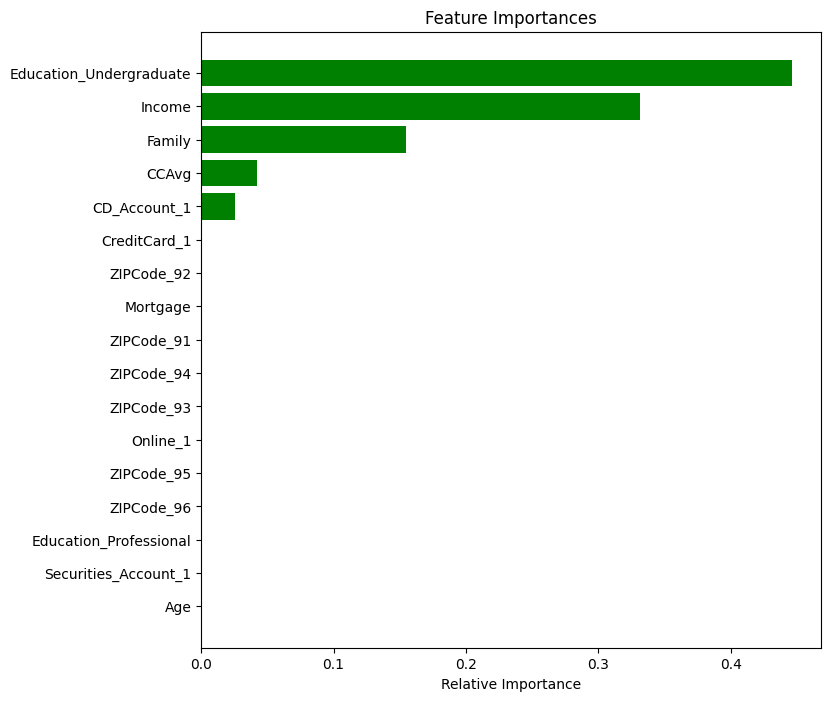

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Post Prunning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.01
7,0.00,0.01
8,0.00,0.01
9,0.00,0.01


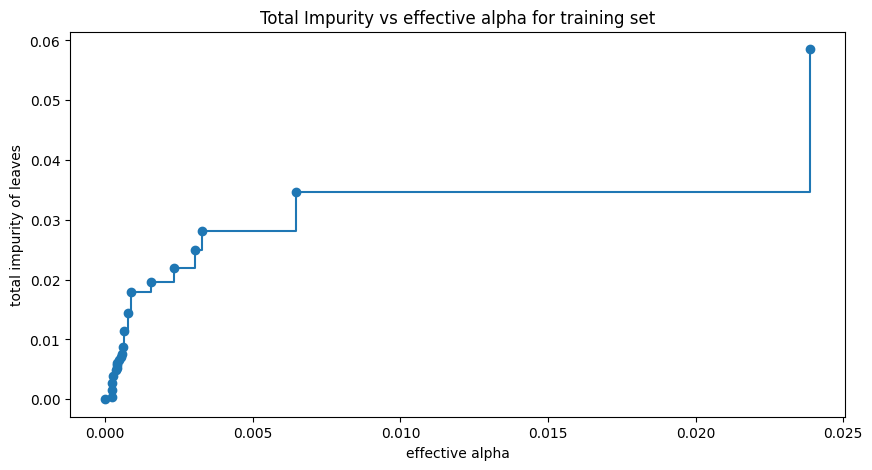

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


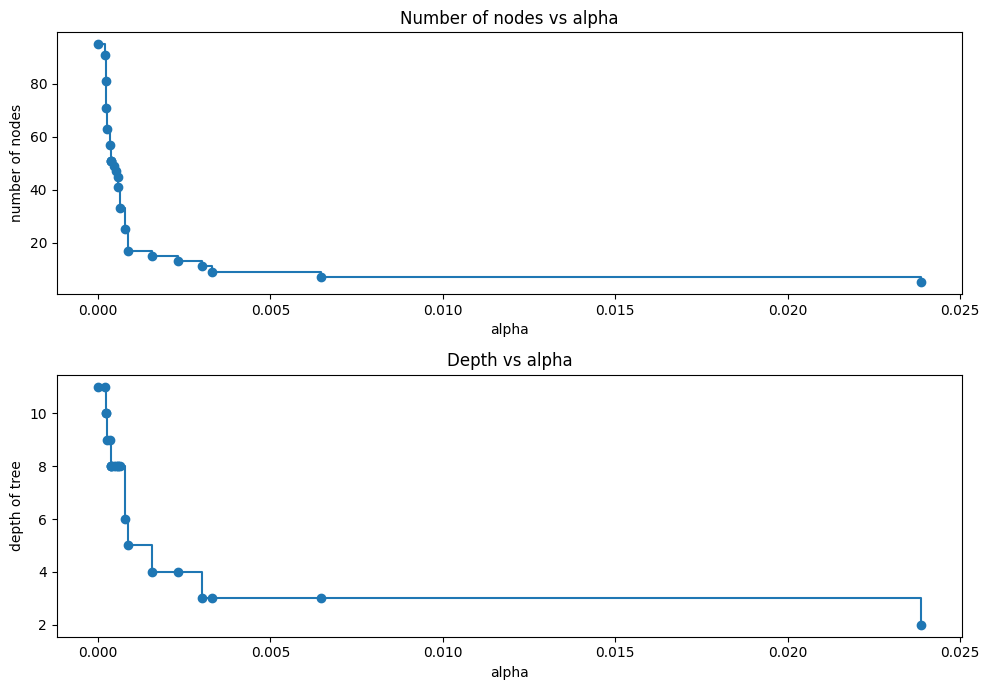

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

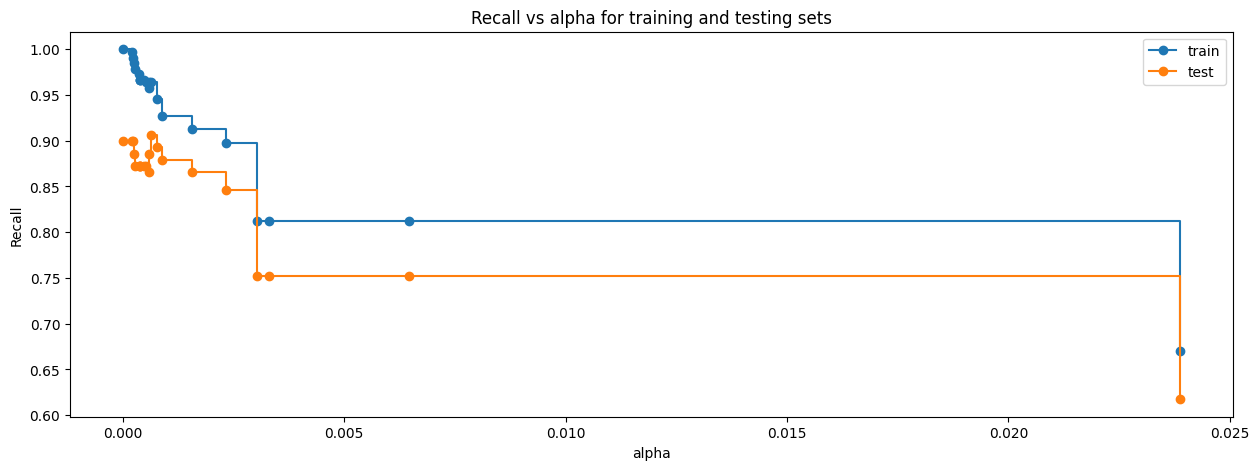

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


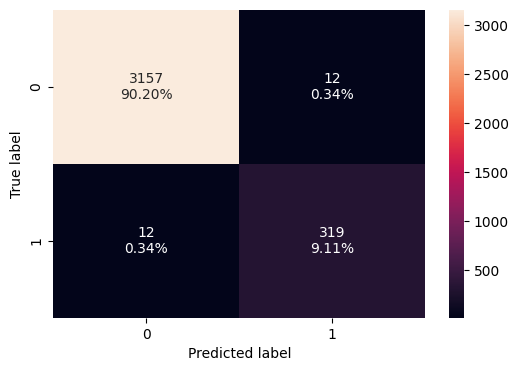

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.99,0.96,0.96,0.96


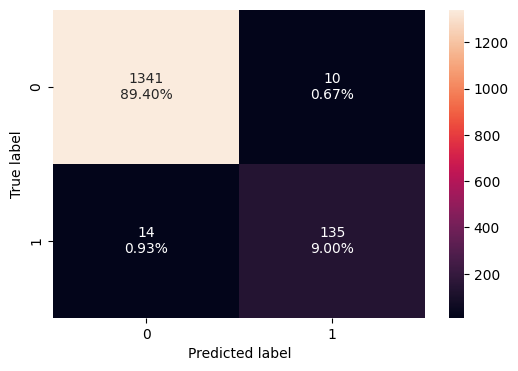

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.98,0.91,0.93,0.92


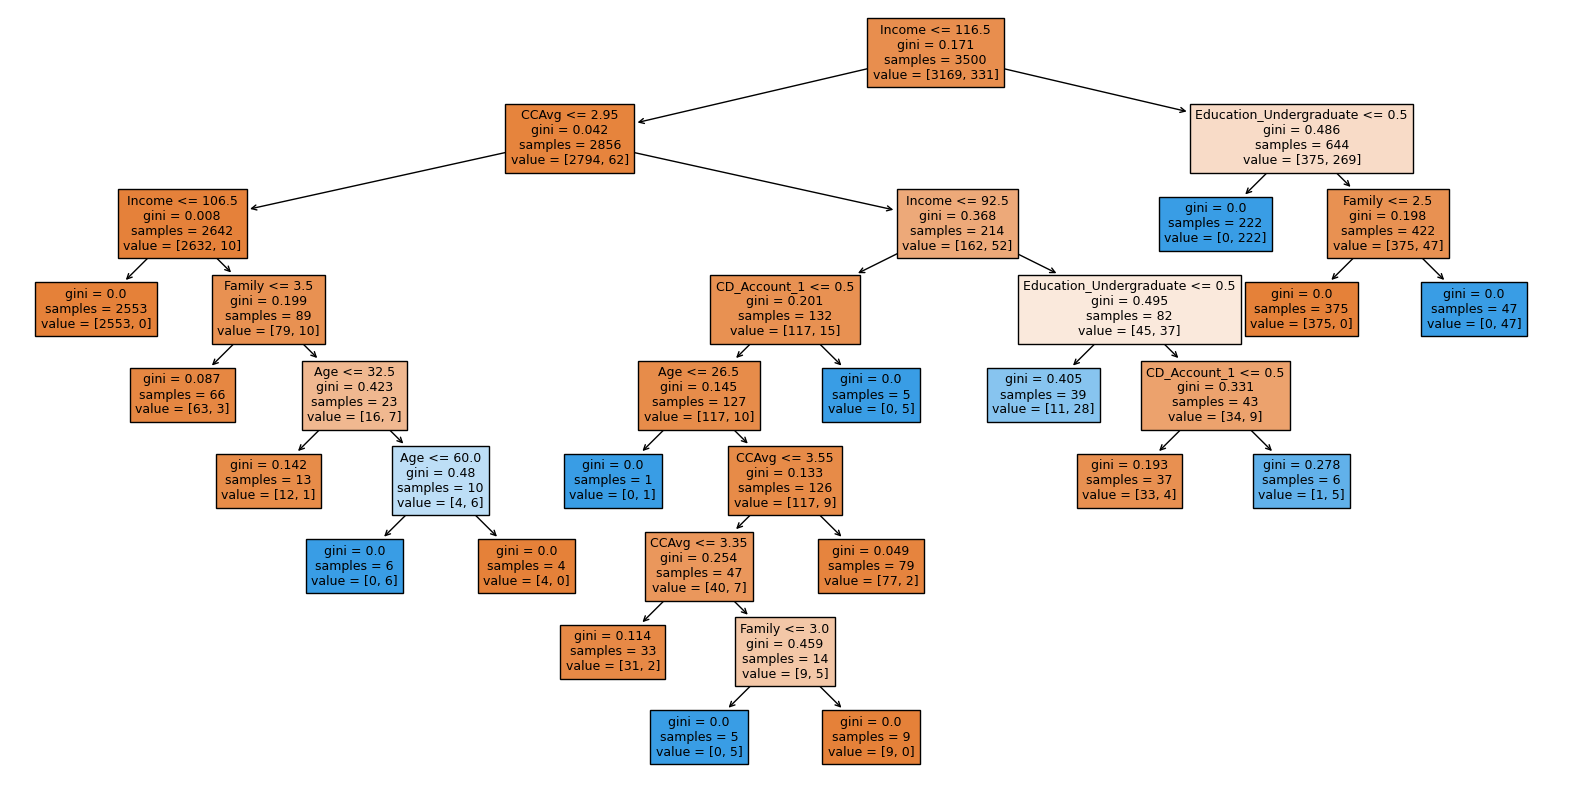

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.35
| 

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

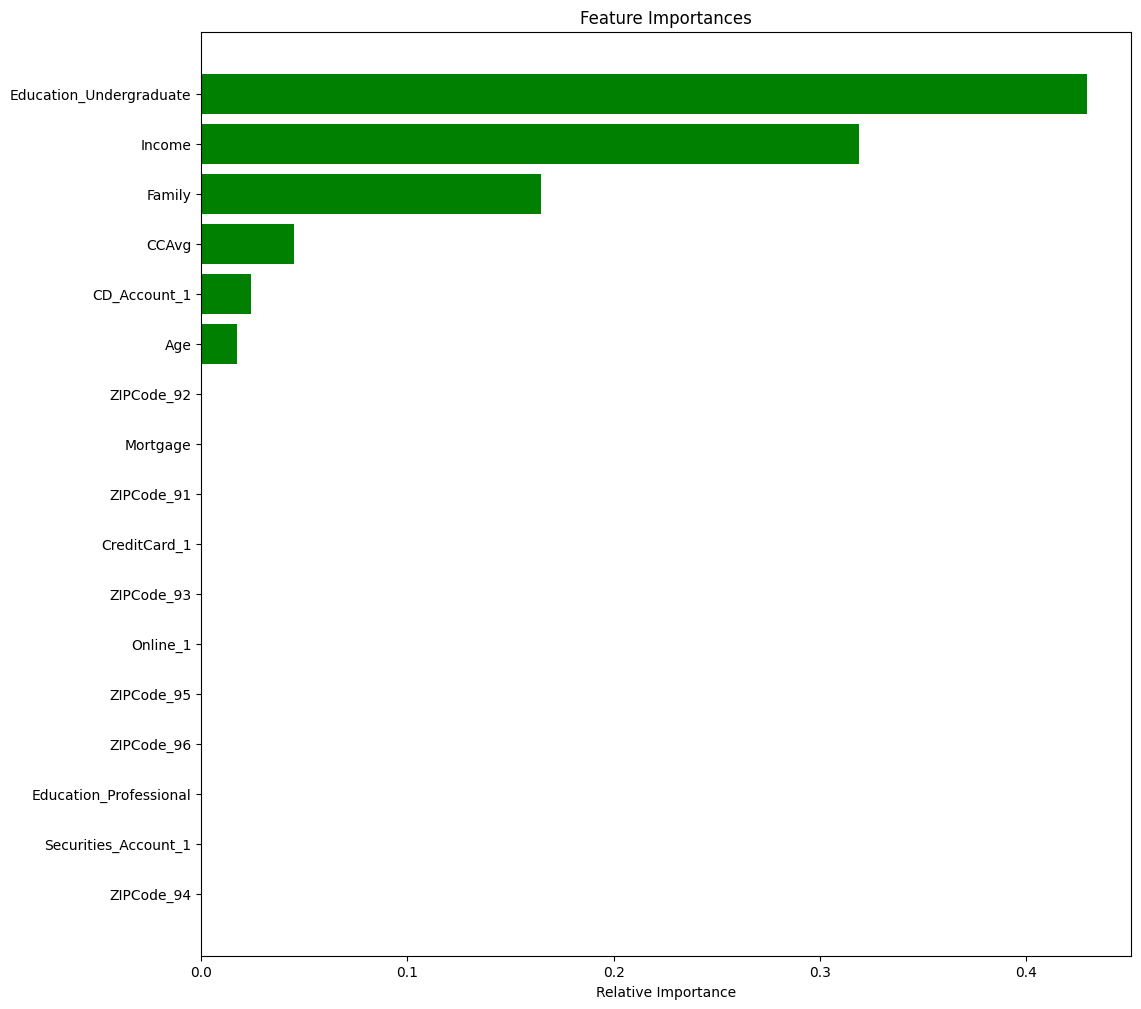

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00,0.99,0.99
Recall,1.00,0.93,0.96
Precision,1.00,0.96,0.96
F1,1.00,0.94,0.96


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.98,0.98,0.98
Recall,0.90,0.88,0.91
Precision,0.89,0.93,0.93
F1,0.90,0.90,0.92


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* The model built can be used to predict if a customer is going to take personal loan or not and can correctly identify 91.0% of the customer taking personal loan .

* Education, Income and family are the most important variables in predicting whether a customer will take loan or not .

* From the decision tree, it has been observed that if the Income is greater than 106.50 and less than or equal to 116.50, the CCAvg is less than or equal to 2.95, family size is greater than 3.5 and the age is greater than 32.50 and less than equal to 60 , then the customer is likely to take personal loan

* Bank should target these customers as they will likely to take loan .

* Bank should use more data for the analysis to get more reliable results .



# References

1. Referred code from descision tree mls section

___